# Kaggle Competition

In the Kaggle competition, the goal is to find out if the Quora questions are actually seeking answers, or they are simply retorical questions and searching for flame wars. 

This is the competition is question: https://www.kaggle.com/c/quora-insincere-questions-classification

## Table of Content

* <a href="#imports">Imports</a>
* <a href="#subset">Creating Smaller Subsets for Analysis</a>
* <a href="#load">Loading Files</a>
* <a href="#length">Analysis based on Length</a>
    * <a href="#letterlength">Length based on Letter-Count</a>
    * <a href="#wordnum">Analysis based on Word-Count</a>
    * <a href="#wordlength">Analysis based on avreage length of the word</a>
* <a href="#letter">Analysis Based on Letters</a>
    * <a href="#letter1">Letters used</a>
    * <a href="#lettergroups">Groups of characters (letters - upper and lower, numbers, punctuation)</a>
    * <a href="#letter2">Letters used (group of 2)</a>
* <a href="#words">Analysis based on Words</a>
    * <a href="#stopwords">Number of stop words in a sentence</a>
* <a href="#phonetics">Phonetics</a>
    * <a href="#typeofsounds">Type of sounds</a>
* <a href="#morphology">Morphology</a>
    * <a href="#morphologypinker">Morphology - Pinker Example</a>
* <a href="#pos">Parts of Speech</a>
* <a href="#diversity">Lexical Diversity</a>
* <a href="#bayes">Bayes Analysis of all Features</a>
* <a href="#logistic">Logistic Regression of all Features</a>

## <a name="imports">Imports</a>

Phonetics chapter assumes that the espeak is also downloaded on the computer. It is only relevant for that part of the notebook. 

In [102]:
import pandas
import numpy
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import lexical_diversity

And also the command to download the nltk databases. I used punkt, stopwords, averaged_perceptron_tagger, universal_tagset.

In [2]:
import nltk

In [3]:
nltk.data.path.append("data")

In [4]:
nltk.download(download_dir="data")

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## <a name="subset">Creating Smaller Subset for Analysis</a>

Because I have a four year old computer with a a smaller amount of RAM, I have decided to make all my analysis with the 2000 elements, with 1000 elements from each class. In order to make this file, I have created it with the prodecure described below. 

First I opened the file with the original data. 

In [5]:
with open("data/train.csv", "r") as read:
    questions_data = pandas.read_csv(read, sep=",", header=0)

Then I created the new pandas dataframe. I added 1000 elements for each class (900 for training and 100 for testing). I had added the random state, becase this acts like the seed and allows for the replication. 

In [6]:
DataFrame0 = questions_data.query('target == 0').sample(n=1000, random_state=2000)
DataFrame1 = questions_data.query('target == 1').sample(n=1000, random_state=2000)

In [7]:
newDataFrameTrain = pandas.DataFrame()
newDataFrameTrain = newDataFrameTrain.append(DataFrame0[100:])
newDataFrameTrain = newDataFrameTrain.append(DataFrame1[100:])

In [8]:
newDataFrameTest = pandas.DataFrame()
newDataFrameTest = newDataFrameTest.append(DataFrame0[:100])
newDataFrameTest = newDataFrameTest.append(DataFrame1[:100])

Then I sorted the new dataframe based on index.

In [9]:
newDataFrameTrain.sort_index(inplace=True)
newDataFrameTest.sort_index(inplace=True)

And saved the whole thing in a file, so I don't need to repeat this every single time. 

In [10]:
newDataFrameTrain.to_csv("data/sara_train.csv", index=False)
newDataFrameTest.to_csv("data/sara_test.csv", index=False)

## <a name="load">Loading Files</a>

Here I am now loading up the subset of all the elements, that I am going to use in the analysis.

In [11]:
with open("data/sara_train.csv", "r") as read:
    train = pandas.read_csv(read, sep=",", header=0)

In [12]:
with open("data/sara_test.csv", "r") as read:
    test = pandas.read_csv(read, sep=",", header=0)

## <a name="length">Analysis based on Length</a>

Here, I am going to calculate different statistics based on length of the text. 

### <a name="letterlength">Length based on Letter-Count</a>

Let us first calculate the length of the question. And then let us check if there is any diffeence in the length of the text, based on the class. 

In [13]:
train["length"] = [len(question) for question in train["question_text"]]
test["length"] = [len(question) for question in test["question_text"]]

Is there any difference in the mean of the question length? It seems so. 

In [14]:
numpy.mean(train.query('target == 0')["length"]), numpy.mean(train.query('target == 1')["length"])

(66.91222222222223, 97.62333333333333)

Since there are differences in the mean of the length of the question, let us check their distribution and how much is it overlapping. 

Text(0.5, 1.0, 'Differences in length')

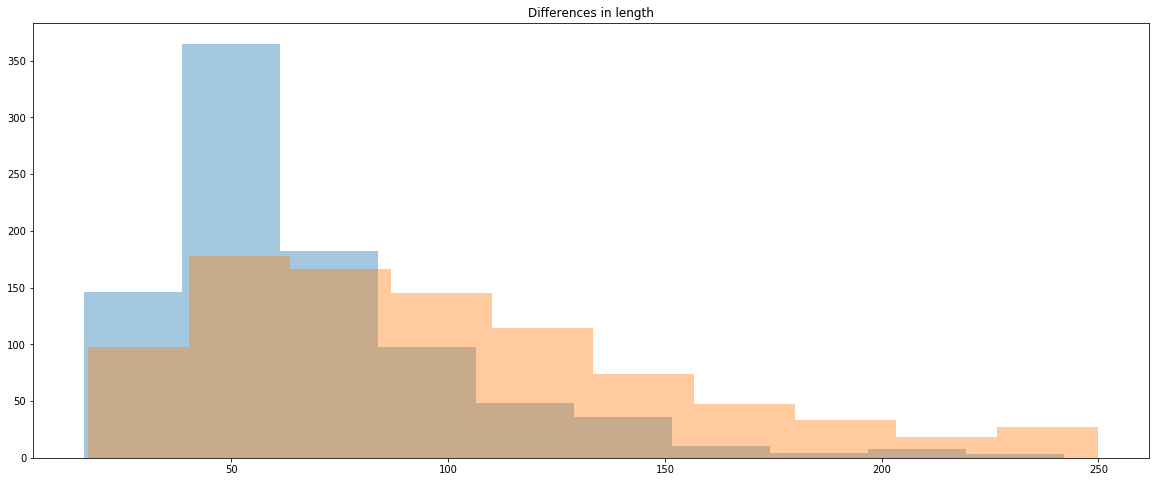

In [15]:
f = plt.figure(figsize=(20,8))
plot1 = f.add_subplot(1, 1, 1)
plot1.hist(train.query('target == 0')["length"], alpha=.4)
plot1.hist(train.query('target == 1')["length"], alpha=.4)
plot1.set_title("Differences in length")

So let us check some of the other values for this two distributions. First the median.

In [16]:
numpy.median(train.query('target == 0')["length"]), numpy.median(train.query('target == 1')["length"])

(57.0, 88.5)

Now the maxsimum length.

In [17]:
numpy.max(train.query('target == 0')["length"]), numpy.max(train.query('target == 1')["length"])

(242, 250)

Now the minimum length.

In [18]:
numpy.min(train.query('target == 0')["length"]), numpy.min(train.query('target == 1')["length"])

(16, 17)

Let us put these now in a more graphical representation.

Text(0.5, 1.0, 'Differences in length - class 1')

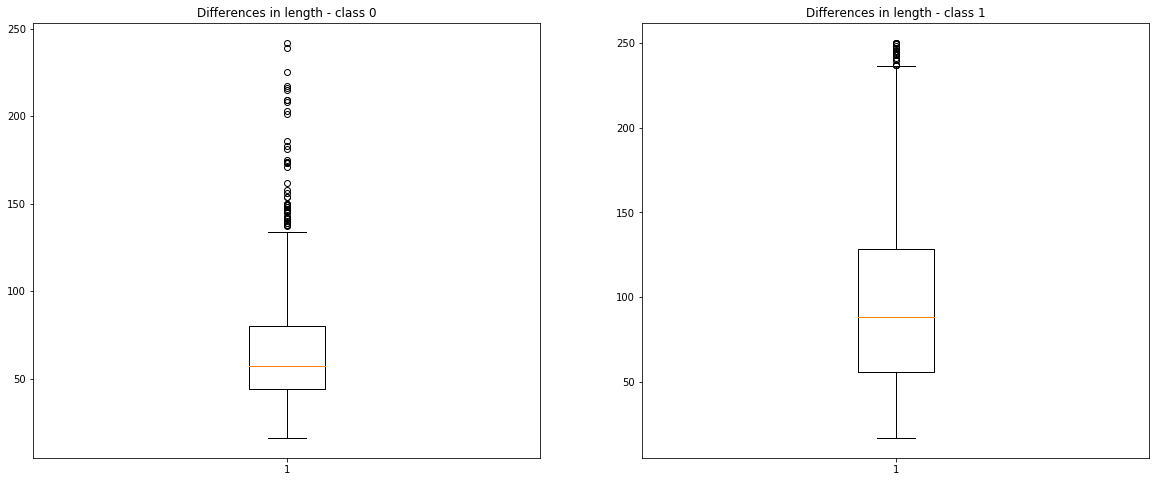

In [19]:
f = plt.figure(figsize=(20,8))
plot1 = f.add_subplot(1, 2, 1)
plot1.boxplot(train.query('target == 0')["length"])
plot1.set_title("Differences in length - class 0")
plot2 = f.add_subplot(1, 2, 2)
plot2.boxplot(train.query('target == 1')["length"])
plot2.set_title("Differences in length - class 1")

It seems that, based on some descriptive statistics, the length of the text based on letter count can be somehow used to differentiate the samples. 

In order to check for how much, I am going to put this in the logistic regression. One thing to keep in mind is, that logistic regression (just like linear regression) does not do well with multicolliniarity. But this is only going to be point latter on. 

In [20]:
log_len_letter = LogisticRegression(solver="lbfgs")
log_len_letter = log_len_letter.fit(numpy.array(train["length"]).reshape(-1, 1), train["target"])

In [21]:
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["length"]).reshape(-1, 1))

In [22]:
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix

array([[69, 31],
       [37, 63]])

In [23]:
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.66

It seems that with just the length of the question in characters, we can come up with about 66% accuracy. 

### <a name="wordnum">Analysis based on Word-Count</a>

Now let us see, if I can get good results also with the word count. For this, let me first count the words. Here I simply devided the elements, the way that were seperated by space.

In [24]:
train["wordnum"] = [len(question.split(" ")) for question in train["question_text"]]
test["wordnum"] = [len(question.split(" ")) for question in test["question_text"]]

Let us see, if there is an avreage difference:

In [25]:
numpy.mean(train.query('target == 0')["wordnum"]), numpy.mean(train.query('target == 1')["wordnum"])

(12.078888888888889, 17.25777777777778)

Next I am also going to try the nltk way, just to see if there are differences. There are, but not by much. It just seems to find more words. 

In [26]:
train["wordnum_nltk"] = [len(word_tokenize(question)) for question in train["question_text"]]
test["wordnum_nltk"] = [len(word_tokenize(question)) for question in test["question_text"]]
numpy.mean(train.query('target == 0')["wordnum_nltk"]), numpy.mean(train.query('target == 1')["wordnum_nltk"])

(13.573333333333334, 19.553333333333335)

Let us now also check in logistic regression. 

In [27]:
log_len_letter = LogisticRegression(solver="lbfgs")
log_len_letter = log_len_letter.fit(numpy.array(train["wordnum"]).reshape(-1, 1), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["wordnum"]).reshape(-1, 1))

In [28]:
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix

array([[67, 33],
       [38, 62]])

In [29]:
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.645

In [30]:
log_len_letter = LogisticRegression(solver="lbfgs")
log_len_letter = log_len_letter.fit(numpy.array(train["wordnum_nltk"]).reshape(-1, 1), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["wordnum_nltk"]).reshape(-1, 1))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.655

It seems that the number of words in the question gives us also 64% accuracy. The nltk is a bit higher, but not by much. 

### <a name="wordlength">Analysis based on avreage length of the word</a>

Next, I am going to check if the length of the word in the question has any effect. The same as before, I will use for the word any string, that is seperated by space. 

In [31]:
train["wordlength"] = [numpy.mean([len(word) for word in question.split(" ")]) for question in train["question_text"]]
test["wordlength"] = [numpy.mean([len(word) for word in question.split(" ")]) for question in test["question_text"]]

Let us see if there is a difference in the avreage length of the word:

In [32]:
numpy.mean(train.query('target == 0')["wordlength"]), numpy.mean(train.query('target == 1')["wordlength"])

(4.720317502736821, 4.750773833840252)

And now for the nltk version as well. I will not also try to remove punctuation, since this would be words with length of 1.

In [33]:
train["wordlength_nltk"] = [numpy.mean([len(word) for word in word_tokenize(question) if len(word) > 1]) for question in train["question_text"]]
test["wordlength_nltk"] = [numpy.mean([len(word) for word in word_tokenize(question) if len(word) > 1]) for question in test["question_text"]]
numpy.mean(train.query('target == 0')["wordlength_nltk"]), numpy.mean(train.query('target == 1')["wordlength_nltk"])

(4.700699640472918, 4.671388218595198)

There does not seem to be any difference. Let us check this graphically as well, only for nltk version. 

Text(0.5, 1.0, 'Differences in avreage length of words - class 1')

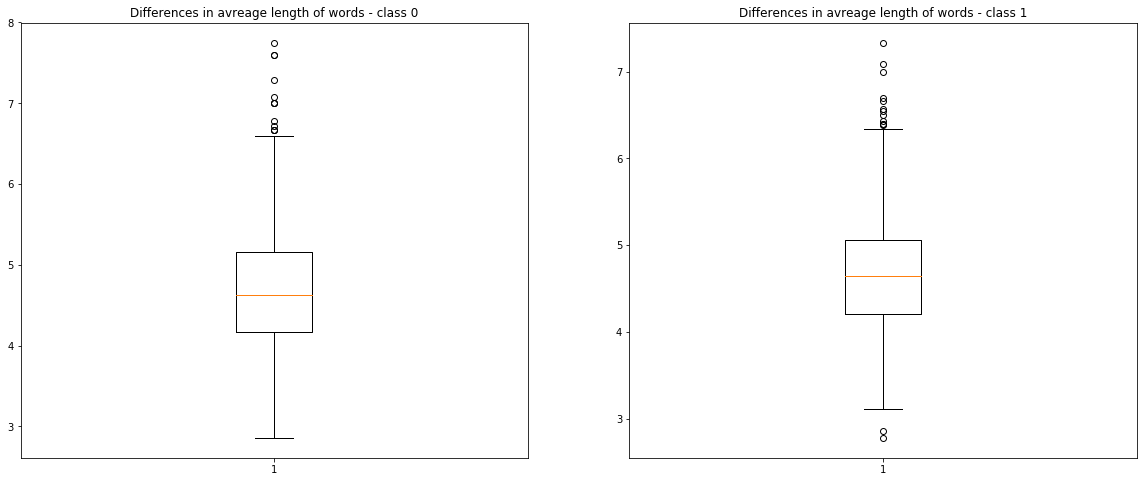

In [34]:
f = plt.figure(figsize=(20,8))
plot1 = f.add_subplot(1, 2, 1)
plot1.boxplot(train.query('target == 0')["wordlength_nltk"])
plot1.set_title("Differences in avreage length of words - class 0")
plot2 = f.add_subplot(1, 2, 2)
plot2.boxplot(train.query('target == 1')["wordlength_nltk"])
plot2.set_title("Differences in avreage length of words - class 1")

So there should be no predictive validity is this. But les us check anyway. 

In [35]:
log_len_letter = LogisticRegression(solver="lbfgs")
log_len_letter = log_len_letter.fit(numpy.array(train["wordlength"]).reshape(-1, 1), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["wordlength"]).reshape(-1, 1))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix

array([[60, 40],
       [56, 44]])

In [36]:
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.52

In [37]:
log_len_letter = LogisticRegression(solver="lbfgs")
log_len_letter = log_len_letter.fit(numpy.array(train["wordlength_nltk"]).reshape(-1, 1), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["wordlength_nltk"]).reshape(-1, 1))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.525

There is barely any predictive vaildity, for either version. 

## <a name="letter">Analysis Based on Letters</a>

In the next part of the analysis, I am going to try and see if there are any observed differences based on the letter and numbers used in the text. 

### <a name="letter1">Letters used</a>

First, we will check which symbols are even used in the texts:

In [38]:
all_characters_in_texts = set()
_ = [[all_characters_in_texts.add(letter) for letter in question] for question in train["question_text"]]

In [39]:
len(all_characters_in_texts)

112

In [40]:
"".join(list(all_characters_in_texts))

'P)&Wf是M\xa0慕G;…5羡kz4ōLm1éU[₹NnBd.妒H-DxsFIXcA样6和(%™河áq殤t0u8#S9E/,g”3] loVvyj>!’Z"w7eJ2hT\'。bçK*ü‘+a:不嫉C–$一pir的?O“YRQ\u200b'

Now I am going to calculate for each question, now many times each character appear there.

In [41]:
for letter in all_characters_in_texts:
    train[letter] = [sum([1 for l in question if l == letter]) for question in train["question_text"]]
    test[letter] = [sum([1 for l in question if l == letter]) for question in test["question_text"]]

Let us now try how much can different letters help with prediction (I increased the number of iterations, since it would not converge with default 100). 

In [42]:
len(all_characters_in_texts)

112

In [43]:
log_len_letter = LogisticRegression(solver="lbfgs", max_iter=10000)
log_len_letter = log_len_letter.fit(numpy.array(train[list(all_characters_in_texts)]).reshape(-1, len(all_characters_in_texts)), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test[list(all_characters_in_texts)]).reshape(-1, len(all_characters_in_texts)))

In [44]:
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix

array([[68, 32],
       [27, 73]])

In [45]:
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.705

By using the letters, it is possible to get the accuracy to 71%. 

### <a name="lettergroups">Groups of characters (letters - upper and lower, numbers, punctuation)</a>

I am also going to calculate the amount of some of the groups of characters. 

In [46]:
numeric = "0123456789"
alpha_lower = "abcdefghijklmnopqrstuvwxyz"
alpha_upper = alpha_lower.upper()
punctuation = ".\",;:!?'()&%"

In [47]:
[n for n in numeric if n in all_characters_in_texts]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [48]:
[l for l in alpha_lower if l in all_characters_in_texts]

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [49]:
[l for l in alpha_upper if l in all_characters_in_texts]

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [50]:
[p for p in punctuation if p in all_characters_in_texts]

['.', '"', ',', ';', ':', '!', '?', "'", '(', ')', '&', '%']

In [51]:
[o for o in all_characters_in_texts if not o in numeric + alpha_lower + alpha_upper + punctuation]

['是',
 '\xa0',
 '慕',
 '…',
 '羡',
 'ō',
 'é',
 '[',
 '₹',
 '妒',
 '-',
 '样',
 '和',
 '™',
 '河',
 'á',
 '殤',
 '#',
 '/',
 '”',
 ']',
 ' ',
 '>',
 '’',
 '。',
 'ç',
 '*',
 'ü',
 '‘',
 '+',
 '不',
 '嫉',
 '–',
 '$',
 '一',
 '的',
 '“',
 '\u200b']

In [52]:
train["numeric"] = [sum([1 for l in question if l in numeric]) for question in train["question_text"]]
train["alphalower"] = [sum([1 for l in question if l in alpha_lower]) for question in train["question_text"]]
train["alphaupper"] = [sum([1 for l in question if l in alpha_upper]) for question in train["question_text"]]
train["punctuation"] = [sum([1 for l in question if l in punctuation]) for question in train["question_text"]]

In [53]:
test["numeric"] = [sum([1 for l in question if l in numeric]) for question in test["question_text"]]
test["alphalower"] = [sum([1 for l in question if l in alpha_lower]) for question in test["question_text"]]
test["alphaupper"] = [sum([1 for l in question if l in alpha_upper]) for question in test["question_text"]]
test["punctuation"] = [sum([1 for l in question if l in punctuation]) for question in test["question_text"]]

I am also going to calculate the ratio of all of these groups of characters.

In [54]:
train["numeric_ratio"] = [sum([1 for l in question if l in numeric]) for question in train["question_text"]]/train["length"]
train["alphalower_ratio"] = [sum([1 for l in question if l in alpha_lower]) for question in train["question_text"]]/train["length"]
train["alphaupper_ratio"] = [sum([1 for l in question if l in alpha_upper]) for question in train["question_text"]]/train["length"]
train["punctuation_ratio"] = [sum([1 for l in question if l in punctuation]) for question in train["question_text"]]/train["length"]

In [55]:
test["numeric_ratio"] = [sum([1 for l in question if l in numeric]) for question in test["question_text"]]/test["length"]
test["alphalower_ratio"] = [sum([1 for l in question if l in alpha_lower]) for question in test["question_text"]]/test["length"]
test["alphaupper_ratio"] = [sum([1 for l in question if l in alpha_upper]) for question in test["question_text"]]/test["length"]
test["punctuation_ratio"] = [sum([1 for l in question if l in punctuation]) for question in test["question_text"]]/test["length"]

Let us now see, if adding these helps with the predictive validity. I will first try with the raw number of the groups of characters.

In [56]:
log_len_letter = LogisticRegression(solver="lbfgs")
log_len_letter = log_len_letter.fit(numpy.array(train[["numeric","alphalower","alphaupper","punctuation"]]).reshape(-1, 4), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test[["numeric","alphalower","alphaupper","punctuation"]]).reshape(-1, 4))

In [57]:
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix

array([[65, 35],
       [36, 64]])

In [58]:
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.645

It seems data by using the raw number of group of characters, it is possible to get an accuracy of 64%.

Let us now try with ratios. 

In [59]:
log_len_letter = LogisticRegression(solver="lbfgs")
log_len_letter = log_len_letter.fit(numpy.array(train[["numeric_ratio","alphalower_ratio","alphaupper_ratio","punctuation_ratio"]]).reshape(-1, 4), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test[["numeric_ratio","alphalower_ratio","alphaupper_ratio","punctuation_ratio"]]).reshape(-1, 4))

In [60]:
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix

array([[44, 56],
       [33, 67]])

In [61]:
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.555

I guess the ratio is not as good predictor as the raw number. Possibly because of the length of the question. 

### <a name="letter2">Letters used (group of 2)</a>

If I remeber correctly, sometimes (at least for words) they also check the groups of words. So 2-grams and 3-grams. Let me do the same thing with letters and see if it will predict anything. 

In [62]:
all_2_grams_letters = set()
_ = [[all_2_grams_letters.add("".join(n_gram).lower()) for n_gram in zip(question[:-1], question[1:])] for question in train["question_text"]]

In [63]:
all_2_grams_letters

{'us',
 'ob',
 'oh',
 '是不',
 '(1',
 '!"',
 'sx',
 't\xa0',
 '3,',
 "'e",
 'rp',
 'xy',
 'ii',
 'ér',
 '-c',
 'du',
 'km',
 '32',
 '/8',
 't/',
 't-',
 'gb',
 'e?',
 'lv',
 '(>',
 'n)',
 'nq',
 '/1',
 'uj',
 "'l",
 'iq',
 '0s',
 'ke',
 "l'",
 'zl',
 '/e',
 'je',
 'h1',
 'o/',
 'q ',
 'yc',
 'rg',
 '97',
 'f?',
 'j2',
 'um',
 '/b',
 'yf',
 'og',
 'n ',
 '22',
 '“s',
 'dv',
 'm)',
 'o?',
 'i6',
 'dt',
 '**',
 '.t',
 'v.',
 'ng',
 'vi',
 'iz',
 'mg',
 'c)',
 '-6',
 'n5',
 '(p',
 "p'",
 'rb',
 '04',
 ' j',
 'k"',
 '+ ',
 '2 ',
 'vs',
 'p?',
 ', ',
 'fd',
 '(g',
 'é)',
 'm,',
 '-m',
 'sn',
 'iv',
 'uu',
 '25',
 'ez',
 'k/',
 'iu',
 'l)',
 'd/',
 'ka',
 'p:',
 'xo',
 'sk',
 'wf',
 '.5',
 ' o',
 '30',
 'n’',
 'lz',
 '19',
 '$5',
 ' c',
 '(a',
 '15',
 '7?',
 '13',
 '31',
 'rk',
 '(f',
 'nt',
 '. ',
 'af',
 'j ',
 'hb',
 'hd',
 '7-',
 ' (',
 'gn',
 'tb',
 ' t',
 '.)',
 'nm',
 'ot',
 'jo',
 '(d',
 'to',
 'hh',
 'pe',
 'im',
 '.s',
 'yz',
 't!',
 '"c',
 '80',
 '1?',
 'tz',
 'üm',
 '\u200b,',
 '.l'

In [64]:
len(all_2_grams_letters)

1204

In [65]:
for letter in all_2_grams_letters:
    train[letter] = [sum([1 for l in question if l == letter]) for question in train["question_text"]]
    test[letter] = [sum([1 for l in question if l == letter]) for question in test["question_text"]]

Now let see, if there is any predictive validity in this.

In [66]:
log_len_letter = LogisticRegression(solver="lbfgs", max_iter=10000)
log_len_letter = log_len_letter.fit(numpy.array(train[list(all_2_grams_letters)]).reshape(-1, len(all_2_grams_letters)), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test[list(all_2_grams_letters)]).reshape(-1, len(all_2_grams_letters)))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.5

And the answer seems to be no, so I am not going to analize it with higher level n-grams based on letters. 

## <a name="words">Analysis based on Words</a>

### <a name="stopwords">Number of stop words in a sentence</a>

Next I am going to see, if there are any stopwords in the sentence and count how many are these. These are usually functunal words, or very frequent ones.

In [67]:
stopWords = set(stopwords.words('english'))

In [68]:
train["stopwords"] = [len([word for word in word_tokenize(question) if len(word) > 1 and word in stopWords]) for question in train["question_text"]]
test["stopwords"] = [len([word for word in word_tokenize(question) if len(word) > 1 and word in stopWords]) for question in test["question_text"]]
numpy.mean(train.query('target == 0')["stopwords"]), numpy.mean(train.query('target == 1')["stopwords"])

(4.391111111111111, 6.647777777777778)

Well, there seems to be some difference. Let us try now, how well does it do predicting. 

In [69]:
log_len_letter = LogisticRegression(solver="lbfgs", max_iter=10000)
log_len_letter = log_len_letter.fit(numpy.array(train["stopwords"]).reshape(-1, 1), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["stopwords"]).reshape(-1, 1))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.625

Well, it seems to have some predictive validity. It can predict it to the 62%. 

## <a name="phonetics">Phonetics</a>

More for fun than anything else, I am also going to try and include some phonetics. It is supposed to be an important part of lingustics, but I don't really know much about it.

In [70]:
from subprocess import check_output

This is how the phonetics of a sentence are then shown:

In [72]:
check_output(["espeak", "-q", "--ipa", '-v', 'en-us', "Oliver Queen is the mayor that the Starling City deserves"]).decode('utf-8')

' ˈɑːlɪvɚ kwˈiːn ɪz ðə mˈeɪɚ ðætðə stˈɑːɹlɪŋ sˈɪɾi dɪzˈɜːvz\n'

The ː prepresents the long sound, so I can calculate, how many long sounds are in the questions.

In [73]:
train["longsound"] = [len([letter for letter in check_output(["espeak", "-q", "--ipa", '-v', 'en-us', question]).decode('utf-8') if letter == "ː"]) for question in train["question_text"]]
test["longsound"] = [len([letter for letter in check_output(["espeak", "-q", "--ipa", '-v', 'en-us', question]).decode('utf-8') if letter == "ː"])for question in test["question_text"]]

In [74]:
numpy.mean(train.query('target == 0')["longsound"]), numpy.mean(train.query('target == 1')["longsound"])

(3.5522222222222224, 5.03)

And surprisingly, there is a difference. So lets see how well can this predict the data. 

In [75]:
log_len_letter = LogisticRegression(solver="lbfgs", max_iter=10000)
log_len_letter = log_len_letter.fit(numpy.array(train["longsound"]).reshape(-1, 1), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["longsound"]).reshape(-1, 1))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.54

Well, the difference is relativly small. That is too bad. 

I can also check the number of sounds in the sentence (which could be different from the number of letters, when we are dealing with the langauge like English).

In [76]:
train["phonlength"] = [len([letter for letter in check_output(["espeak", "-q", "--ipa", '-v', 'en-us', question]).decode('utf-8')]) for question in train["question_text"]]
test["phonlength"] = [len([letter for letter in check_output(["espeak", "-q", "--ipa", '-v', 'en-us', question]).decode('utf-8')])for question in test["question_text"]]

In [77]:
numpy.mean(train.query('target == 0')["phonlength"]), numpy.mean(train.query('target == 1')["phonlength"])

(78.73777777777778, 110.77888888888889)

Just like with letters, there is a difference. But how big is it really?

In [78]:
log_len_letter = LogisticRegression(solver="lbfgs", max_iter=10000)
log_len_letter = log_len_letter.fit(numpy.array(train["phonlength"]).reshape(-1, 1), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["phonlength"]).reshape(-1, 1))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.63

Well, better than the long sounds, but it actually faired a bit less well, than the length based just on letters. 

### <a name="typeofsounds">Type of sounds</a>

Types of sounds also have a different effect on the psychology of people. This can allow them to produce different effects. So maybe people that want to be taken seriouslly use different phonology than people staring the flame wars. 

This is the citation, that was in my notes: 

*"Among the discoveries Leben made: Fricatives convey “faster” and “smaller” — as do vowels that are voiced near the front of the mouth, like the a in “bat” or the i in “hid.” Plosives, or stops, convey “slower” and “bigger” — as do vowels that are voiced at the back of the throat, like the o in “token” or the double o’s in “food.” So-called voiceless stops like k, p, and t are more alive and daring than voiced stops like b, d and g, while the voiceless convey less luxury than the voiced. And all sound-symbolic effects manifest differently depending on context. They take on properties of the product being named."*

I used the IPA chart from: http://www.internationalphoneticalphabet.org/ipa-sounds/ipa-chart-with-sounds/

In [79]:
phonology_front = "iyɪʏeøɛæ"
phonology_back = "ɨʉʊɘɵəœɜɞɐaä"
phonology_plosive = "pbtd"
phonology_frictive = "ɸβfvθðszʃʒ"
phonology_nasal = "mɱn"
phonology_lat_frictive = "ɬɮ"

In [80]:
def get_phonological_groups(text):
    fast_list = phonology_front + phonology_frictive + phonology_lat_frictive
    slow_list = phonology_back + phonology_nasal + phonology_plosive
    i = j = 0
    for fast in fast_list:
        i += len([1 for letter in text if fast])
    for slow in slow_list:
        j += len([1 for letter in text if fast])
    return i, j

In [81]:
train["phon_fast"] = [get_phonological_groups(question)[0] for question in train["question_text"]]
test["phon_fast"] = [get_phonological_groups(question)[0] for question in test["question_text"]]
train["phon_slow"] = [get_phonological_groups(question)[1] for question in train["question_text"]]
test["phon_slow"] = [get_phonological_groups(question)[1] for question in test["question_text"]]
train["phon_speed_ratio"] = train["phon_fast"]/train["phon_slow"]
test["phon_speed_ratio"] = test["phon_fast"]/test["phon_slow"]

Let us see, if there are some differences based on this.

In [82]:
numpy.mean(train.query('target == 0')["phon_fast"]), numpy.mean(train.query('target == 1')["phon_fast"])

(1338.2444444444445, 1952.4666666666667)

In [83]:
numpy.mean(train.query('target == 0')["phon_slow"]), numpy.mean(train.query('target == 1')["phon_slow"])

(1271.3322222222223, 1854.8433333333332)

In [84]:
numpy.mean(train.query('target == 0')["phon_speed_ratio"]), numpy.mean(train.query('target == 1')["phon_speed_ratio"])

(1.0526315789473684, 1.0526315789473684)

Considering the ratio is basically the same, the difference is probablly just the result of different lengths. 

## <a name="morphology">Morphology</a>

### <a name="morphologypinker">Morphology - Pinker Example</a>

In the book The Language Instinkt, Pinker mentiones how English is morphologically rich, when it comes to creating words from different types of words. For example, fish can be used as noun (the fish) but also as a verb (to fish). He also produces the number of word endings, that English is using to do this. This list is what I am going to use here. 

In [85]:
word_add_ons = ["able", "age", "al", "an", "ant", "ance", "ary", "ate", "ed", "en", "er", "ful", "hood", 
                "ic", "ify", "ion", "ish", "ism", "iest", "ity", "ive", "ize", "ly", "ment", "ness", "ory",
               "ous", "y"]

In [86]:
def find_all_addons(words_add_ons, text):
    all_examples = 0
    for add_on in words_add_ons:
        all_examples += len(re.findall(add_on, text))
    return all_examples

In [87]:
train["morphologypinker"] = [find_all_addons(word_add_ons, question) for question in train["question_text"]]
test["morphologypinker"] = [find_all_addons(word_add_ons, question) for question in test["question_text"]]

In [88]:
numpy.mean(train.query('target == 0')["morphologypinker"]), numpy.mean(train.query('target == 1')["morphologypinker"])

(5.11, 8.027777777777779)

And it seems that there is some difference again. But let me check, how predictive it is. 

In [89]:
log_len_letter = LogisticRegression(solver="lbfgs", max_iter=10000)
log_len_letter = log_len_letter.fit(numpy.array(train["morphologypinker"]).reshape(-1, 1), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test["morphologypinker"]).reshape(-1, 1))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.65

Well, I think that by now I can say that most things are predictive in about this rang. 

## <a name="pos">Parts of Speech</a>

Let me now try the parts of speech tagging. I am hoping that this will allow me a clean way of tagging nouns, since I have a idea or two, that I want to try with it later. 

In [90]:
all_tags = set()
_ = [[all_tags.add(tag) for word, tag in pos_tag(word_tokenize(question), tagset="universal")] for question in train["question_text"]]

In [91]:
all_tags

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [92]:
for current_tag in all_tags:
    train["tag_" + current_tag] = [len([tag for word, tag in pos_tag(word_tokenize(question), tagset="universal") if tag==current_tag])for question in train["question_text"]]
    test["tag_" + current_tag] = [len([tag for word, tag in pos_tag(word_tokenize(question), tagset="universal") if tag==current_tag])for question in test["question_text"]]

Let us now see, if there are any big differences in the three most prominent groups: nouns, adjectives and verbs.

In [93]:
numpy.mean(train.query('target == 0')["tag_NOUN"]), numpy.mean(train.query('target == 1')["tag_NOUN"])

(3.482222222222222, 5.007777777777778)

In [94]:
numpy.mean(train.query('target == 0')["tag_ADJ"]), numpy.mean(train.query('target == 1')["tag_ADJ"])

(0.9988888888888889, 1.4955555555555555)

In [95]:
numpy.mean(train.query('target == 0')["tag_VERB"]), numpy.mean(train.query('target == 1')["tag_VERB"])

(2.5533333333333332, 3.758888888888889)

There seems to be some minimal differences. Let me now also check with the logistic regression.

In [96]:
tag_names = ["tag_" + tag for tag in all_tags]

In [97]:
log_len_letter = LogisticRegression(solver="lbfgs", max_iter=10000)
log_len_letter = log_len_letter.fit(numpy.array(train[tag_names]).reshape(-1, len(tag_names)), train["target"])
log_len_letter_prediction = log_len_letter.predict(numpy.array(test[tag_names]).reshape(-1, len(tag_names)))
log_len_letter_confusion_matrix = confusion_matrix(test["target"], log_len_letter_prediction)
log_len_letter_confusion_matrix
(log_len_letter_confusion_matrix[0][0] + log_len_letter_confusion_matrix[1][1])/sum(sum(log_len_letter_confusion_matrix))

0.675

Well, there is at least some predictive validity in this. 

## <a name="diversity">Lexical Diversity</a>

When I was reading the articles about the fanfiction, I have came accross the article that talked about lexical diversity. So I used the code from here: https://github.com/jfrens/lexical_diversity/, to calculate it.

In [107]:
train["lexical_diversity"] = [lexical_diversity.mtld(question.split()) for question in train["question_text"]]
test["lexical_diversity"] = [lexical_diversity.mtld(question.split()) for question in test["question_text"]]

ValueError: Input word list should be at least 50 in length

Sadly, because of the length, this did not work at all. 

## <a name="bayes">Bayes Analysis of all Features</a>

On the end, I will try to see, how good is the prediction, if all features are used. 

In [113]:
number_of_features = train.shape[1] - 3

In [114]:
model_bayes = MultinomialNB()
model_bayes = model_bayes.fit(numpy.array(train.iloc[:, 3:]).reshape(-1, number_of_features), train["target"])
model_bayes_prediction = model_bayes.predict(numpy.array(test.iloc[:, 3:]).reshape(-1, number_of_features))
model_bayes_confusion_matrix = confusion_matrix(test["target"], model_bayes_prediction)
model_bayes_confusion_matrix

array([[62, 38],
       [23, 77]])

In [115]:
(model_bayes_confusion_matrix[0][0] + model_bayes_confusion_matrix[1][1])/sum(sum(model_bayes_confusion_matrix))

0.695

## <a name="logistic">Logistic Regression of all Features</a>

In [116]:
model_logistic = LogisticRegression(solver="lbfgs", max_iter=10000)
model_logistic = log_len_letter.fit(numpy.array(train.iloc[:, 3:]).reshape(-1, number_of_features), train["target"])
model_logistic_prediction = log_len_letter.predict(numpy.array(test.iloc[:, 3:]).reshape(-1, number_of_features))
model_logistic_confusion_matrix = confusion_matrix(test["target"], model_logistic_prediction)
model_logistic_confusion_matrix

array([[71, 29],
       [23, 77]])

In [117]:
(model_logistic_confusion_matrix[0][0] + model_logistic_confusion_matrix[1][1])/sum(sum(model_logistic_confusion_matrix))

0.74